<a class="anchor" id="0"></a>
# **prediction des troubles musculosquelettiques**

## **Preparation de l'espce de travail**

***importation des packages***

In [56]:
import pandas as pd  # Pandas est utilisé pour la manipulation et l'analyse de données.
import matplotlib.pyplot as plt  # Matplotlib.pyplot permet de créer des graphiques et des visualisations.
import seaborn as sns  # Seaborn est une bibliothèque basée sur Matplotlib pour des graphiques statistiques attractifs.
import numpy as np  # NumPy est utilisé pour le calcul scientifique et supporte des tableaux et matrices multidimensionnels.


***importation des classes***

In [57]:
from sklearn.preprocessing import LabelEncoder
#Les modeles
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import  LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

***importation des fonctions***

In [58]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import plot_tree, export_text #Visualiser un abre de décision représenté sous forme textuelle
# Fonctions pour évaluer les modèles
from sklearn.metrics import (confusion_matrix,classification_report,accuracy_score,roc_auc_score,recall_score,
                             precision_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_curve,auc)

from sklearn.preprocessing import StandardScaler  # Fonction pour la normalisation des données

# Fonctions pour la validation croisée et la recherche d'hyperparamètres

from sklearn.model_selection import train_test_split, GridSearchCV 

***défintion des instances***

In [59]:
encoder = LabelEncoder()# Crée une instance de LabelEncoder pour convertir les étiquettes de catégories en valeurs numériques
scaler = StandardScaler()# Créer une instance pour standardiser les variables
# Création des instances des modèles

models={
'lgb': LGBMClassifier(verbose=-1), # Classificateur LightGBM avec sortie de journalisation désactivée
'rfc' : RandomForestClassifier(),  # Classificateur utilisant une forêt d'arbres décisionnels
'gbc' : GradientBoostingClassifier(),  # Classificateur utilisant le boosting par gradient
'etc' : ExtraTreesClassifier(), # Classificateur utilisant des arbres décisionnels extrêmement aléatoires
'adabc': AdaBoostClassifier(),  # Classificateur utilisant le boosting adaptatif
'logit' : LogisticRegression(),  # Régression logistique pour classification binaire ou multiclasse
'rc': RidgeClassifier(), # Classificateur Ridge, une variante de la régression linéaire avec régularisation L2
'lsvc ' : LinearSVC(), # Classificateur à vecteurs de support linéaire
'gnb' : GaussianNB(), # Classificateur Naïve Bayes gaussien
'knc' : KNeighborsClassifier(),  # Classificateur basé sur les k plus proches voisins
'mlpc' : MLPClassifier(random_state=1),  # Classificateur à perceptron multicouche (réseau de neurones)
'dtc' : DecisionTreeClassifier(),  # Classificateur basé sur un arbre de décision
'dc': DummyClassifier(),  # Classificateur factice pour établir des baselines simples
'qda': QuadraticDiscriminantAnalysis(),  # Analyse discriminante quadratique pour classification
'svm':SVC(kernel='rbf', gamma=1,probability=True)# SVM à noyau gaussien de paramètre gamma=0.01
     }
# Liste des noms des modèles sous forme de chaînes de caractères
# Évaluation de chaque nom de modèle dans la liste pour obtenir les instances correspondantes

***importation des données***

In [60]:
data= pd.read_excel('Base_simplifiée.xlsx')
print(f"Cette base décrit {data.shape[0]} individus sur {data.shape[1]} variables qui sont {list(data.columns)} ")

Cette base décrit 1720 individus sur 16 variables qui sont ['Hopital consulté', 'Sexe', 'Profession', 'Ethnie', 'Age', "Classe d'age", 'Revenu mensuel moyen', 'Antécédent familial de cancer', 'Organe primaire de la maladie cancéreuse', 'Présence de métastases', 'Durée du traitement', 'consommation active de substances psychostimulantes non prescrites médicalement', 'Score total OSLO', 'Classification OSLO', 'Score de dépistage', 'Résultat dépistage'] 


***supprimer des variables redondantes et présentation des données***

In [61]:
df_no_numeric=data.drop(['Score total OSLO','Age','Score de dépistage'],axis=1)
df_no_numeric.shape

(1720, 13)

Après avoir supprimer les variables similiares, ils nous restent 13 variables.

A présent, nous allons transformer les modalitésdes variables en numérique.

In [62]:
# Crée un DataFrame vide
df = pd.DataFrame()
# Boucle sur chaque variable du DataFrame df_no_numeric
for variable in df_no_numeric.columns:
    # Applique LabelEncoder sur chaque variable pour transformer ses modalités en numérique
    # et stocke les résultats transformés dans le DataFrame df,matthews_corrcoef,roc_curve,auc)

    df[variable] = encoder.fit_transform(df_no_numeric[variable])

#rennoncer une variables de noms très long
df.rename(columns={'consommation active de substances psychostimulantes non prescrites médicalement':'cons active sub psy non prescirtes'}, inplace='True')

#afficher la base
df.head()


,Hopital consulté,Sexe,Profession,Ethnie,Classe d'age,Revenu mensuel moyen,Antécédent familial de cancer,Organe primaire de la maladie cancéreuse,Présence de métastases,Durée du traitement,cons active sub psy non prescirtes,Classification OSLO,Résultat dépistage
0,0,1,4,0,4,0,0,16,1,5,0,2,1
1,0,0,2,0,2,3,1,15,1,5,0,1,0
2,1,0,3,4,2,3,0,8,1,0,0,2,0
3,1,0,3,0,2,3,0,14,1,5,0,0,0
4,1,0,0,4,2,0,0,15,2,5,0,0,1


***Distribution de la variable cible***

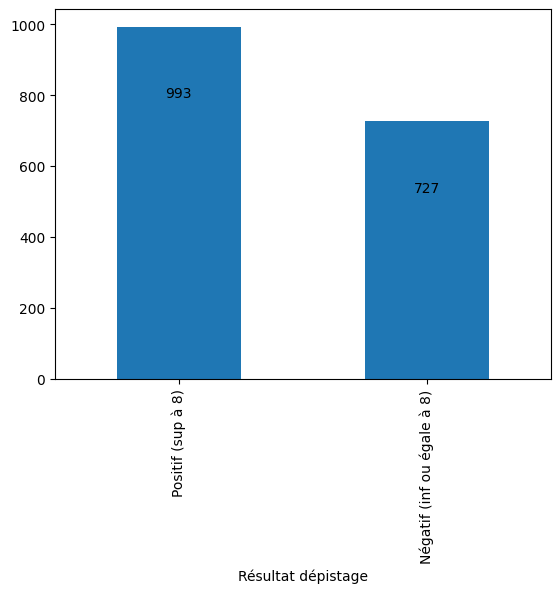

In [63]:
#target variable distribution

frequence=data['Résultat dépistage'].value_counts()
frequence.plot(kind='bar')
for i, nombre in enumerate(frequence):
    plt.text(i,nombre - 200, str(nombre),ha='center')
plt.show()


***Visualisation de la corrélation entre les variables***

In [64]:
# Remplace les noms des colonnes de X par de nouveaux noms.
# La liste de compréhension [f'V{i}' for i in range(1, 12)] crée une liste de
# chaînes de caractères allant de 'V1' à 'V11'. Cela renomme les colonnes de X
# en utilisant cette liste, en commençant par 'V1' pour la première colonne, 'V2'
# pour la deuxième, etc., jusqu'à 'V11' pour la onzième colonne.
df.columns = [f'V{i}' for i in range(1, 14)]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0,1,4,0,4,0,0,16,1,5,0,2,1
1,0,0,2,0,2,3,1,15,1,5,0,1,0
2,1,0,3,4,2,3,0,8,1,0,0,2,0
3,1,0,3,0,2,3,0,14,1,5,0,0,0
4,1,0,0,4,2,0,0,15,2,5,0,0,1


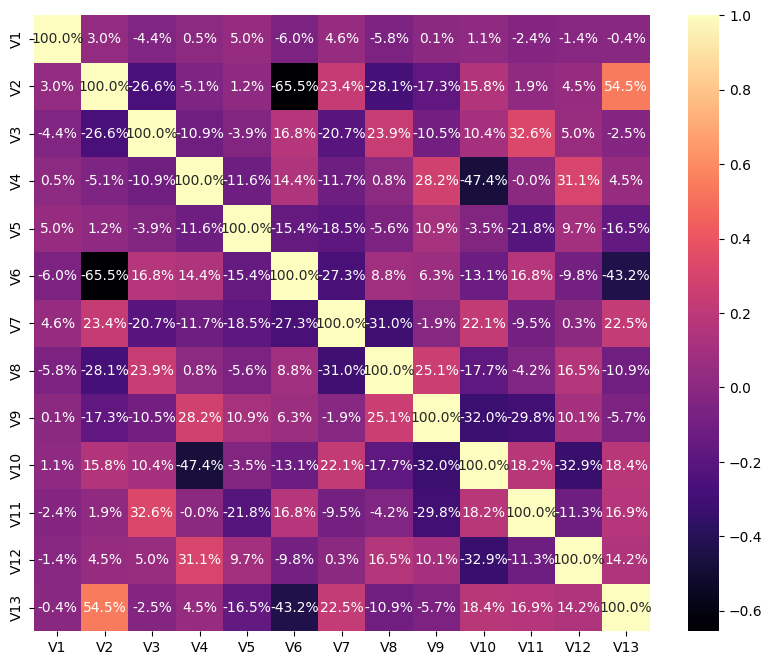

In [65]:
# Visualisation des corrélations entre la variable cible 'charges' et les autres variables
# Calculer la corrélation de la variable 'Résultat dépistage' avec toutes les autres variables et trier les résultats
df.corr()['V13'].sort_values()

# Créer une sous-figure avec une taille spécifiée pour la heatmap
f, ax = plt.subplots(figsize=(10, 8))

# Calculer la matrice de corrélation pour toutes les variables
corr = df.corr()

# Créer une heatmap pour visualiser la matrice de corrélation
# Paramètres :
# - cbar=True : Afficher la barre de couleur
# - square=True : Assurer que la heatmap est de forme carrée
# - fmt='.1%' : Formater les valeurs de corrélation en pourcentages avec une décimale
# - annot=True : Annoter chaque cellule avec la valeur numérique
# - cmap='magma' : Utiliser la colormap 'magma' pour la coloration
sns.heatmap(corr, cbar=True, square=True, fmt='.1%', annot=True, cmap='magma')

# Afficher la heatmap
plt.show()


La variable "Hôpital consulté" montre une très faible corrélation avec le "Résultat dépistage" (valeur de -0.4%). Cette valeur est très proche de zéro, indiquant qu'il n'y a pratiquement aucune relation entre l'hôpital où le patient a été consulté et le résultat du dépistage. En d'autres termes, le choix de l'hôpital consulté n'influence pas de manière significative les résultats du dépistage selon les données représentées dans cette carte thermique.

1. La variable **Sexe (0.545)** présente la corrélation la plus forte : une corrélation positive modérée entre le sexe et le résultat du dépistage. Cela signifie que le sexe de l'individu peut avoir une influence notable sur le résultat du dépistage.

2. Le **Revenu mensuel moyen (-0.432)** a une corrélation négative modérée entre le revenu mensuel moyen et le résultat du dépistage. Cela suggère qu'un revenu plus élevé peut être associé à de moins bons résultats de dépistage ou inversement.

3. L'**Antécédent familial de cancer (0.225)** a une faible corrélation positive entre les antécédents familiaux de cancer et le résultat du dépistage, impliquant que les antécédents familiaux de cancer peuvent être légèrement liés à un meilleur résultat de dépistage.

4. La **Classe d'âge (-0.165)** : a une faible corrélation négative entre la classe d'âge et le résultat du dépistage, indiquant que l'âge peut avoir un effet, bien que léger, sur les résultats de dépistage.

5. La **Classification OSLO (0.142)** a une faible corrélation positive entre la classification OSLO et le résultat du dépistage, ce qui pourrait indiquer une certaine influence de cette classification sur les résultats de dépistage.

6. La **Durée du traitement (0.184)**: a une faible corrélation positive entre la durée du traitement et le résultat du dépistage, ce qui peut suggérer que la durée du traitement pourrait avoir un effet sur les résultats de dépistage.

Les autres variables présentes aussi des corrélations avec la variable dépendante et dans une proportion très faibles.

In [66]:
#supprime la variable hopital consulté
df=df.drop(['V1'],axis=1)

**séparation des variables**

In [67]:
#Remplacer les espaces dans les noms des colonnes
#df.columns = df.columns.str.replace(' ', '_')

In [68]:
# Assigne la colonne 'Résultat_dépistage' du DataFrame df à la variable y,
# qui représentera la variable cible pour les modèles de machine learning.
y = df['V13']  # cible

# Crée un nouveau DataFrame X en supprimant la colonne 'Résultat_dépistage'
# de df. Cela signifie que X contiendra toutes les colonnes sauf 'Résultat_dépistage'.
# X représentera les caractéristiques (features) pour les modèles de machine learning.
X = df.drop(['V13'], axis=1)  # caractéristiques

#standardise les variables prédictrices

X= scaler.fit_transform(X)

**Diviser le jeu de données en ensemble d'entraînement et ensemble de test**

In [69]:
# Vérifier la distribution des classes
# split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
# Vérifier la distribution des classes
print(f"Distribution des classes dans les données d'entraînement :\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"Distribution des classes dans les données textes :\n{pd.Series(y_test).value_counts(normalize=True)}")

Distribution des classes dans les données d'entraînement :
V13
1    0.577035
0    0.422965
Name: proportion, dtype: float64
Distribution des classes dans les données textes :
V13
1    0.578488
0    0.421512
Name: proportion, dtype: float64


# **I-Entraînement des modeles**

## **I-1-Courbe ROC**

KeyboardInterrupt: 

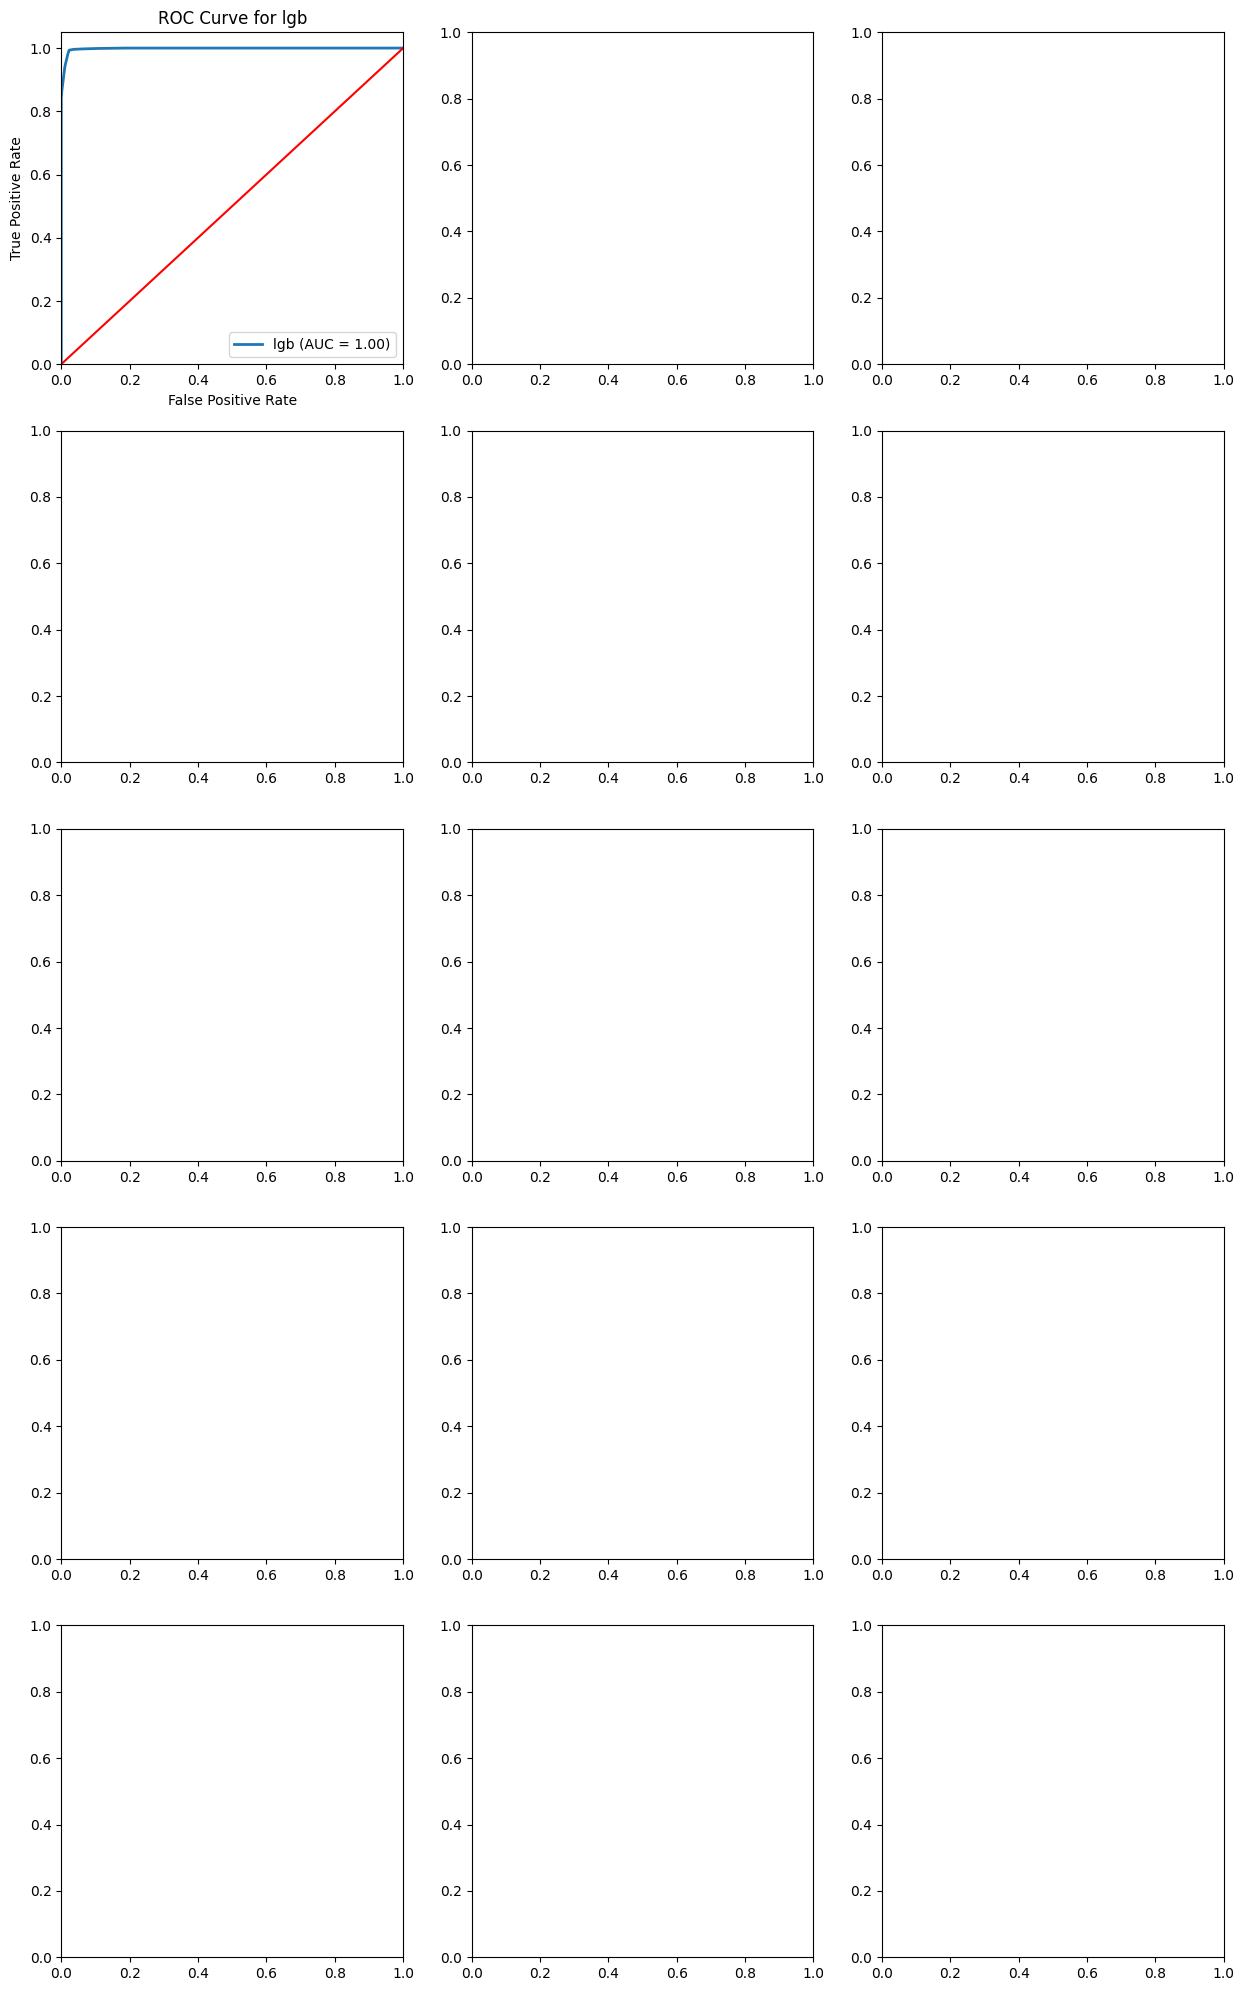

In [70]:
# Initialisation des résultats
results_train = {
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],
}

# initialisation des dataframes de predictions
#predictions = pd.DataFrame()

predictions_train=pd.DataFrame()

# Calculer le nombre de lignes nécessaires
num_models = len(models)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols  # arrondir vers le haut

# Initialisation des sousgraphiques
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Entraînement et évaluation des modèles
for i, (name, model) in enumerate(models.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    predictions_train[f'{name}'] =y_train_pred
    y_train_prob0 = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    
    if  y_train_prob0 is not None:
        fpr, tpr, _ = roc_curve(y_train, y_train_prob0)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    results_train['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    results_train['AUC'].append(roc_auc_score(y_train, y_train_prob0) if y_train_prob0 is not None else np.nan)
    results_train['Recall'].append(recall_score(y_train,  y_train_pred))
    results_train['Precision'].append(precision_score(y_train,  y_train_pred))
    results_train['F1'].append(f1_score(y_train,  y_train_pred))
    results_train['Kappa'].append(cohen_kappa_score(y_train, y_train_pred))
    results_train['MCC'].append(matthews_corrcoef(y_train, y_train_pred))

    # Tracer la courbe ROC
    ax.plot([0, 1], [0, 1], color='red', linestyle='-')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {name}')
    ax.legend(loc="lower right")

## **I-2-Matrice de Confusion**

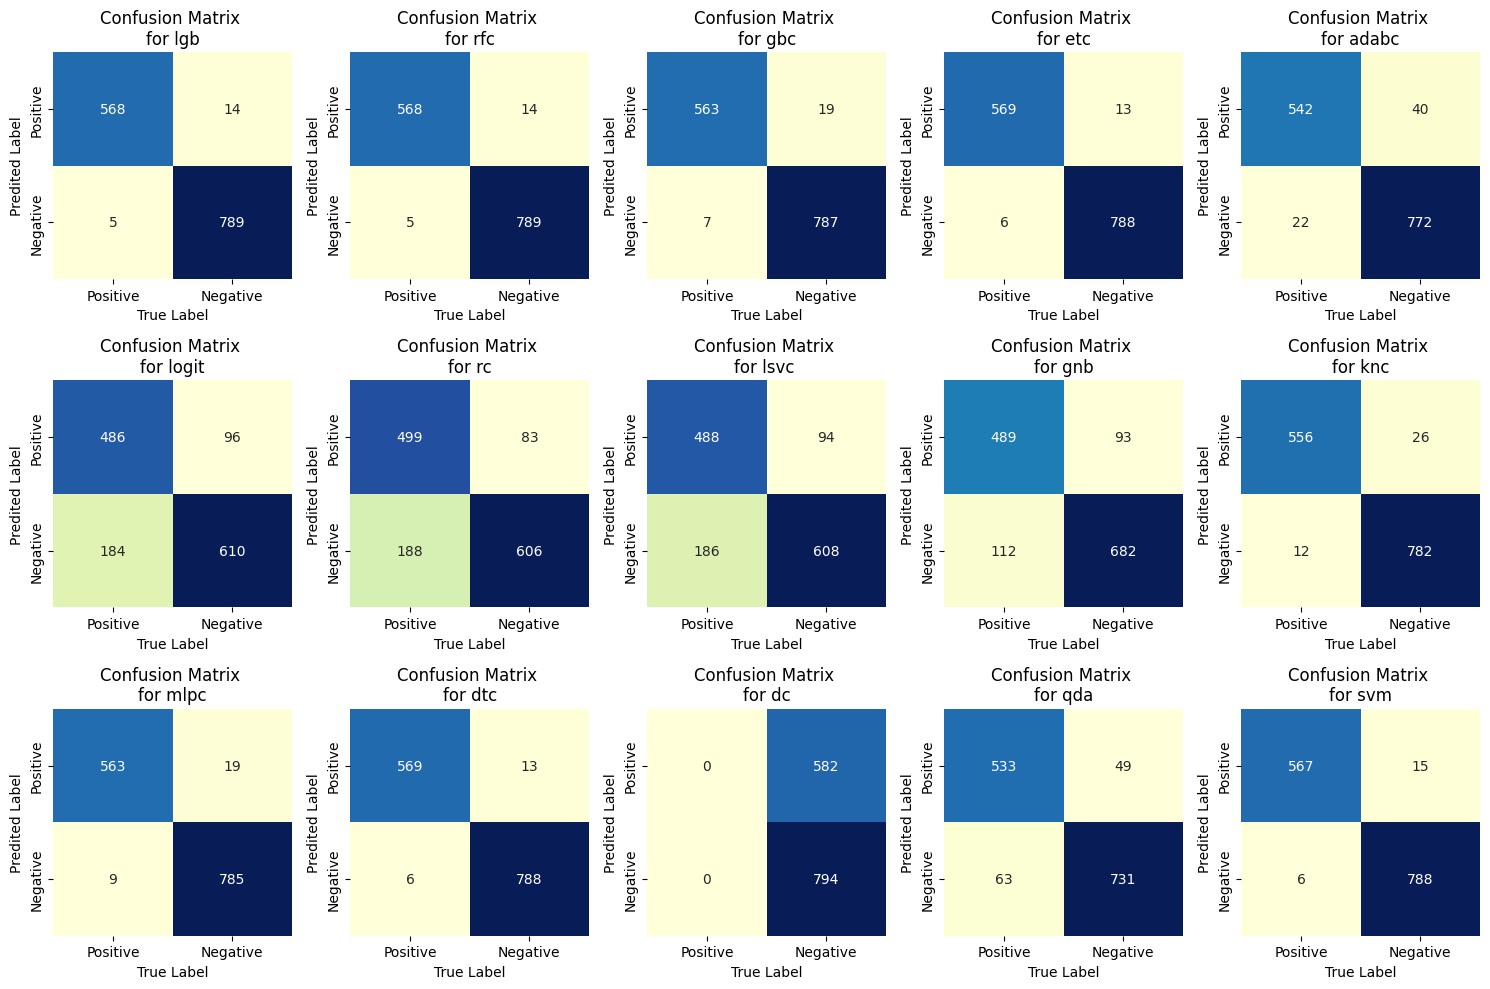

In [ ]:
predict=np.array(predictions_train)
CM={}
for i in range(len(predictions_train.columns)):
    cm = confusion_matrix(y_train,predictions_train.iloc[:,i])
    CM[f'{predictions_train.columns[i]}']=cm
# Création des sous-graphes pour afficher les matrices de confusion
fig, axes = plt.subplots(3,5, figsize=(15, 10))

# Itération sur les modèles et leurs matrices de confusion
for ax, (model_name, cm) in zip(axes.flatten(), CM.items()):
    cm_matrix = pd.DataFrame(data=cm, columns=['Positive', 'Negative'], 
                             index=['Positive', 'Negative'])
    
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix \nfor {model_name}')
    ax.set_ylabel('Predited Label')
    ax.set_xlabel('True Label')

# Ajustement de la disposition pour éviter le chevauchement des sous-graphes
plt.tight_layout()
plt.show()
#plt.savefig('matrice_de_confusion.png')


## **I-3-Metrics des models**

In [ ]:
# Création du DataFrame des résultats
#df_results = pd.DataFrame(results, index=models.keys())
df_results_train=pd.DataFrame(results_train,index=models.keys())
df_results_train

,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
lgb,0.986192,0.998240,0.993703,0.982565,0.988103,0.971654,0.971741
rfc,0.986192,0.997926,0.993703,0.982565,0.988103,0.971654,0.971741
gbc,0.981105,0.992906,0.991184,0.976427,0.983750,0.961184,0.961338
etc,0.986192,0.998354,0.992443,0.983770,0.988088,0.971667,0.971720
adabc,0.954942,0.979525,0.972292,0.950739,0.961395,0.907310,0.907639
logit,0.796512,0.891407,0.768262,0.864023,0.813333,0.591376,0.596314
rc,0.803052,NaN,0.763224,0.879536,0.817262,0.606016,0.613203
lsvc,0.796512,NaN,0.765743,0.866097,0.812834,0.591743,0.597140
gnb,0.851017,0.900490,0.858942,0.880000,0.869344,0.696114,0.696391
knc,0.972384,0.990658,0.984887,0.967822,0.976280,0.943242,0.943448


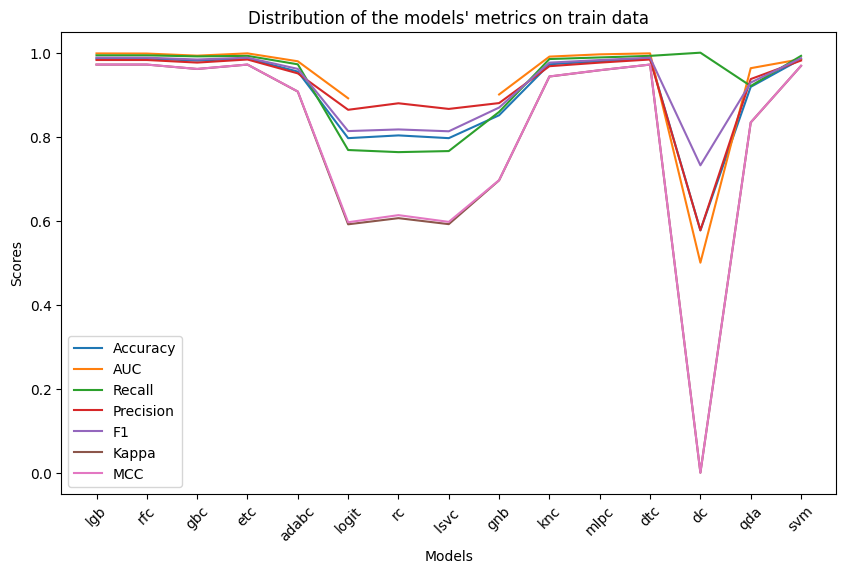

In [ ]:
# Tracé du graphique 
plt.figure(figsize=(10, 6))
for metric in df_results_train.columns:
    plt.plot(df_results_train.index, df_results_train[metric], label=metric)
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.title("Distribution of the models' metrics on train data")
plt.show()

# **II-Test of models**

## **II-1-ROC Curve**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


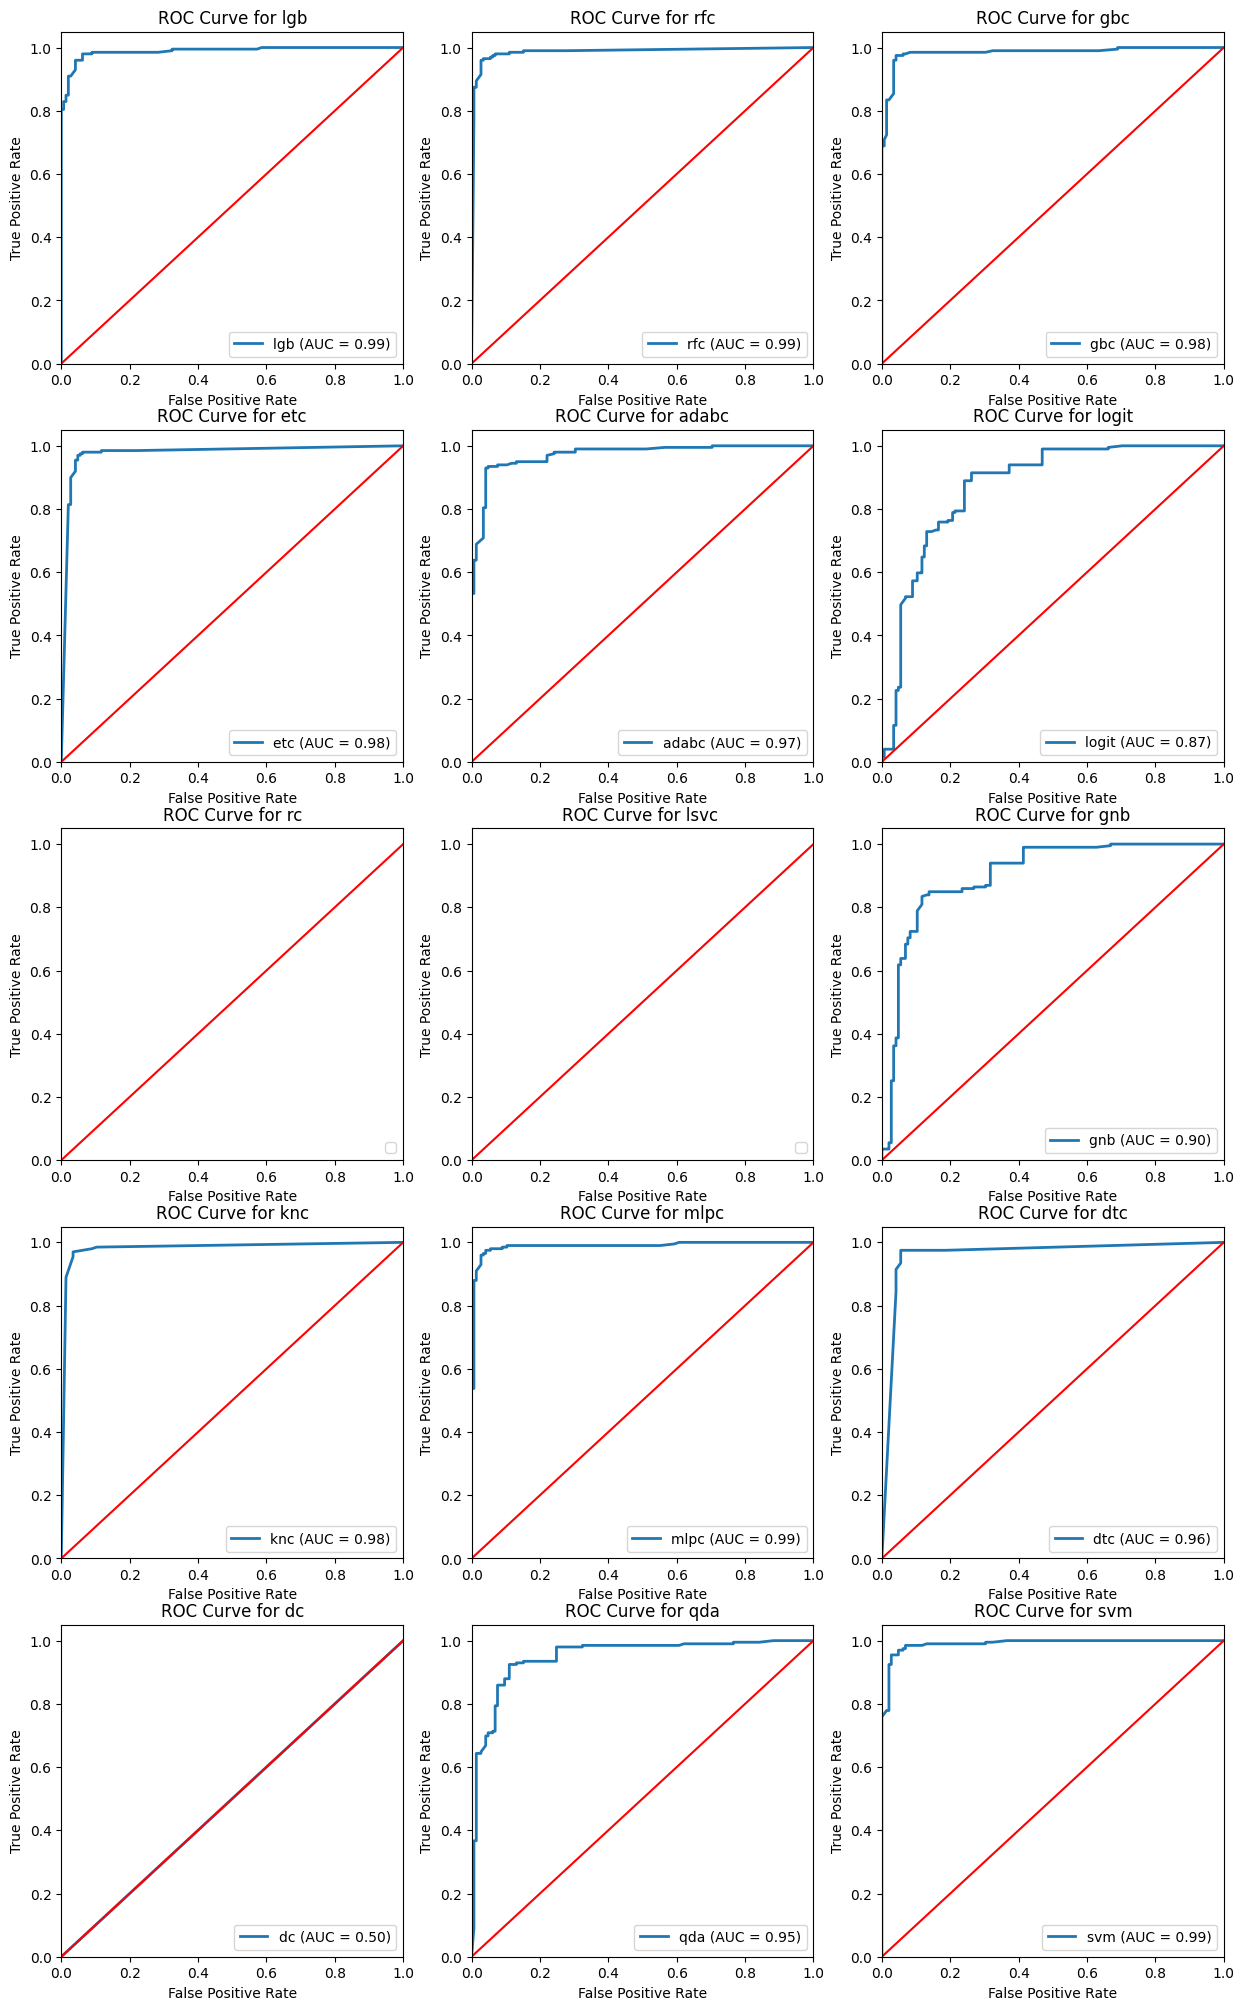

In [ ]:
results = {
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],
}
# initialisation des dataframes de predictions
predictions = pd.DataFrame()
# Calculer le nombre de lignes nécessaires
num_models = len(models)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols  # arrondir vers le haut

# Initialisation des sousgraphiques
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Entraînement et évaluation des modèles
for i, (name, model) in enumerate(models.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]

    y_pred0= model.predict(X_test)
    predictions[f'{name}'] = y_pred0
    y_prob0 = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob0 is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob0)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    results['Accuracy'].append(accuracy_score(y_test, y_pred0))
    results['AUC'].append(roc_auc_score(y_test, y_prob0) if y_prob0 is not None else np.nan)
    results['Recall'].append(recall_score(y_test, y_pred0))
    results['Precision'].append(precision_score(y_test, y_pred0))
    results['F1'].append(f1_score(y_test, y_pred0))
    results['Kappa'].append(cohen_kappa_score(y_test, y_pred0))
    results['MCC'].append(matthews_corrcoef(y_test, y_pred0))
    
    # Tracer la courbe ROC
    ax.plot([0, 1], [0, 1], color='red', linestyle='-')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {name}')
    ax.legend(loc="lower right")

## **II-2-Confusion-matrix**

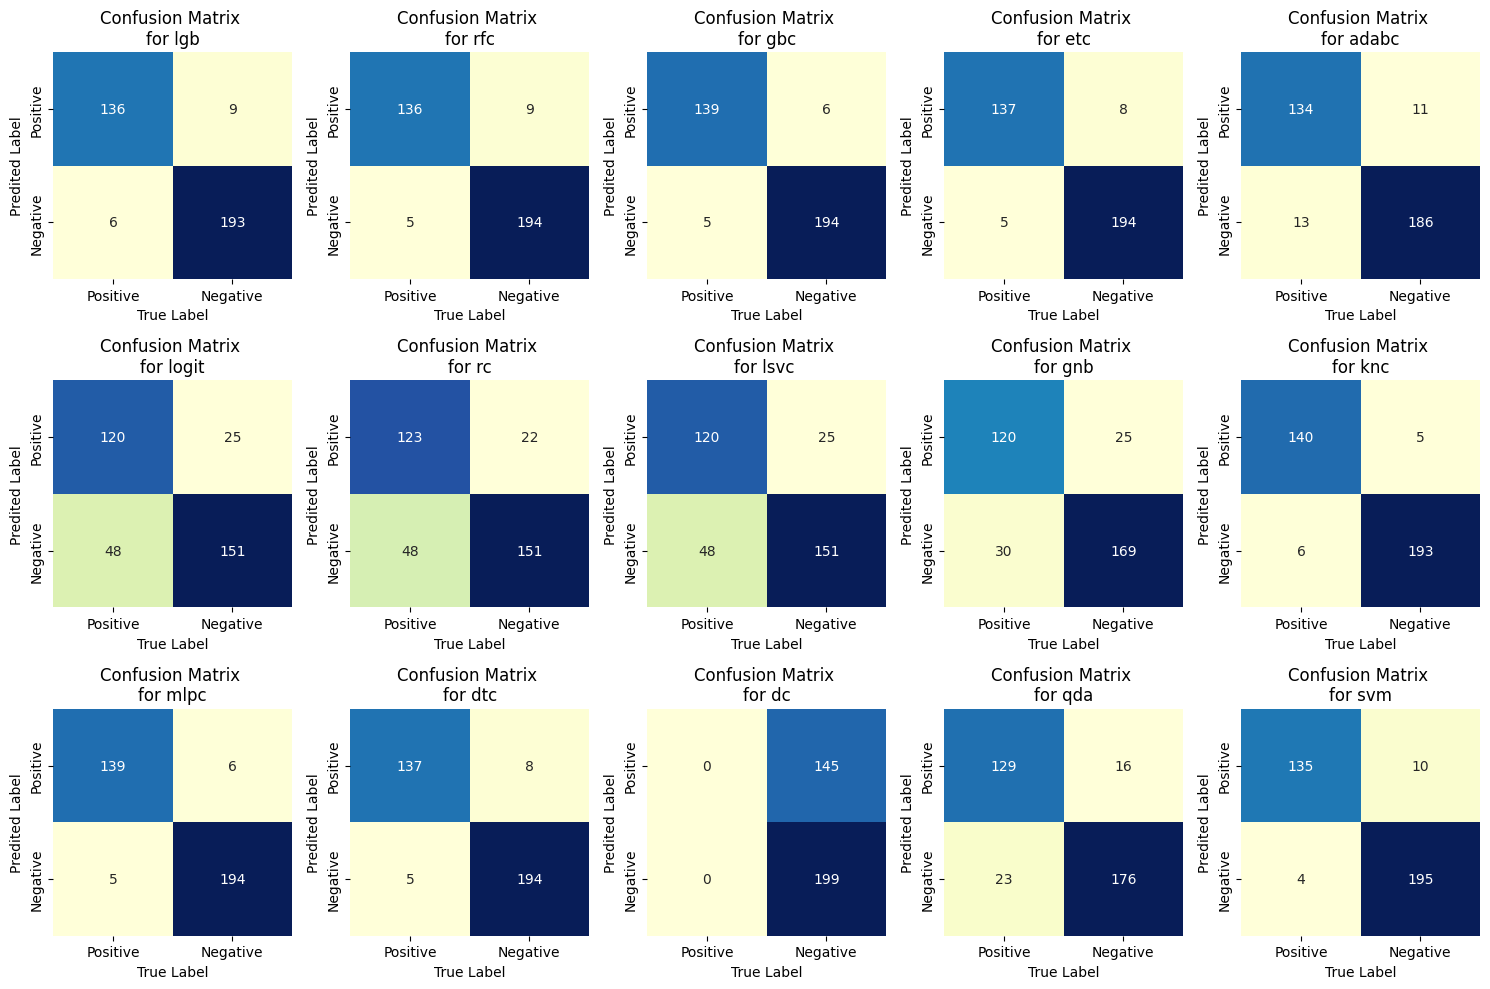

In [ ]:
predict=np.array(predictions)
CM={}
for i in range(len(predictions.columns)):
    cm = confusion_matrix(y_test,predictions.iloc[:,i])
    CM[f'{predictions.columns[i]}']=cm
# Création des sous-graphes pour afficher les matrices de confusion
fig, axes = plt.subplots(3,5, figsize=(15, 10))

# Itération sur les modèles et leurs matrices de confusion
for ax, (model_name, cm) in zip(axes.flatten(), CM.items()):
    cm_matrix = pd.DataFrame(data=cm, columns=['Positive', 'Negative'], 
                             index=['Positive', 'Negative'])
    
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix \nfor {model_name}')
    ax.set_ylabel('Predited Label')
    ax.set_xlabel('True Label')

# Ajustement de la disposition pour éviter le chevauchement des sous-graphes
plt.tight_layout()
plt.show()
#plt.savefig('matrice_de_confusion.png')


## **II-3-Models' Metrics**

In [ ]:

# Création du DataFrame des résultats
df_results = pd.DataFrame(results, index=models.keys())
df_results

,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
lgb,0.956395,0.988598,0.969849,0.955446,0.962594,0.910336,0.910482
rfc,0.959302,0.985878,0.974874,0.955665,0.965174,0.916235,0.916497
gbc,0.968023,0.984301,0.974874,0.970000,0.972431,0.934369,0.934386
etc,0.962209,0.975966,0.974874,0.960396,0.967581,0.922291,0.922439
adabc,0.930233,0.971669,0.934673,0.944162,0.939394,0.857207,0.857268
logit,0.787791,0.871391,0.758794,0.857955,0.805333,0.574026,0.579267
rc,0.796512,NaN,0.758794,0.872832,0.811828,0.592651,0.599554
lsvc,0.787791,NaN,0.758794,0.857955,0.805333,0.574026,0.579267
gnb,0.840116,0.901854,0.849246,0.871134,0.860051,0.673681,0.673977
knc,0.968023,0.982343,0.969849,0.974747,0.972292,0.934492,0.934509


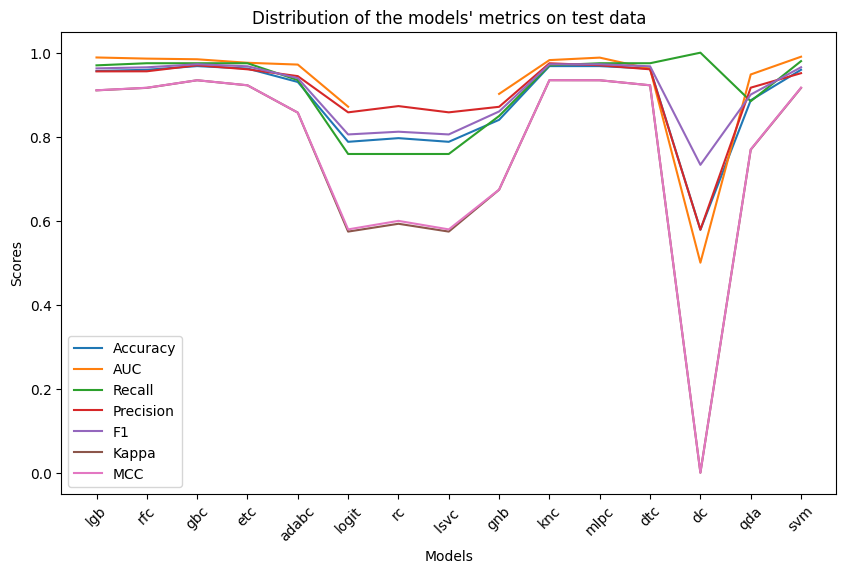

In [ ]:
# Tracé du graphique 
plt.figure(figsize=(10, 6))
for metric in df_results.columns:
    plt.plot(df_results.index, df_results[metric], label=metric)
    #plt.plot(df_results_train.index,df_results_train[metric],label=metric,linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.title("Distribution of the models' metrics on test data")
plt.show()

# **III-Comparison**

In [ ]:
# Concaténer les deux DataFrames
df_results_tous = pd.concat([ df_results.rename(columns=lambda x: f"{x}(test)"),
                             df_results_train.rename(columns=lambda x: f"{x}(train)")], axis=1)
# Afficher le résultat
df_results_tous.to_excel('metricsdesmodels.xlsx')
df_results_tous

,Accuracy(test),AUC(test),Recall(test),Precision(test),F1(test),Kappa(test),MCC(test),Accuracy(train),AUC(train),Recall(train),Precision(train),F1(train),Kappa(train),MCC(train)
lgb,0.956395,0.988598,0.969849,0.955446,0.962594,0.910336,0.910482,0.986192,0.998240,0.993703,0.982565,0.988103,0.971654,0.971741
rfc,0.959302,0.985878,0.974874,0.955665,0.965174,0.916235,0.916497,0.986192,0.997926,0.993703,0.982565,0.988103,0.971654,0.971741
gbc,0.968023,0.984301,0.974874,0.970000,0.972431,0.934369,0.934386,0.981105,0.992906,0.991184,0.976427,0.983750,0.961184,0.961338
etc,0.962209,0.975966,0.974874,0.960396,0.967581,0.922291,0.922439,0.986192,0.998354,0.992443,0.983770,0.988088,0.971667,0.971720
adabc,0.930233,0.971669,0.934673,0.944162,0.939394,0.857207,0.857268,0.954942,0.979525,0.972292,0.950739,0.961395,0.907310,0.907639
logit,0.787791,0.871391,0.758794,0.857955,0.805333,0.574026,0.579267,0.796512,0.891407,0.768262,0.864023,0.813333,0.591376,0.596314
rc,0.796512,NaN,0.758794,0.872832,0.811828,0.592651,0.599554,0.803052,NaN,0.763224,0.879536,0.817262,0.606016,0.613203
lsvc,0.787791,NaN,0.758794,0.857955,0.805333,0.574026,0.579267,0.796512,NaN,0.765743,0.866097,0.812834,0.591743,0.597140
gnb,0.840116,0.901854,0.849246,0.871134,0.860051,0.673681,0.673977,0.851017,0.900490,0.858942,0.880000,0.869344,0.696114,0.696391
knc,0.968023,0.982343,0.969849,0.974747,0.972292,0.934492,0.934509,0.972384,0.990658,0.984887,0.967822,0.976280,0.943242,0.943448


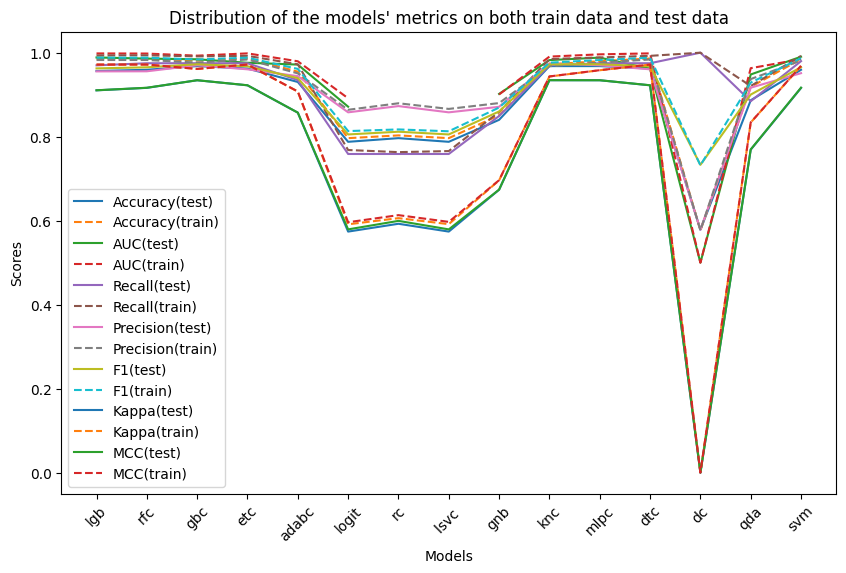

In [ ]:
# Tracé du graphique 
plt.figure(figsize=(10, 6))
for metric1,metric2 in zip(df_results.columns,df_results_train.columns):
    plt.plot(df_results.index, df_results[metric1], label=f"{metric1}(test)")
    plt.plot(df_results_train.index,df_results_train[metric2],label=f"{metric2}(train)",linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.title("Distribution of the models' metrics on both train data and test data")
plt.show()

#### Observations générales

1. A partir du tableau des métriques d'évaluation, des graphiques de la courbe ROC des différents modeles et le graphique des métriques, on remarque que les modèles Ridge Classifier (RC) et LinearSupportVectionClassifier (lsvc) n'affichent pas de métriques AUC. Ce qui a rendu leurs courbes ROC vides et a entraîné un saut de la courbe de l'AUC sur le graphique de performances. En effet, ni `LinearSVC` ni `RidgeClassifier` n'ont la méthode `predict_proba` et ne peuvent donc pas fournir les probabilités de prédctions des classes. Cependant,on peut utiliser `SVC` avec le paramètre `probability=True`. Cela permet d'activer un ajustement basé sur la probabilité par validation croisée interne, mais cela rend l'entraînement du modèle plus lent. Dans le cas de `RidgeClassifier`, il n'y a pas de méthode directe pour calculer les probabilités. Il fournit seulement des prédictions de classe. Il y a deux alternatives pour le faire : la 1ère est d'utiliser `CalibratedClassifierCV` pour calibrer les scores de décision du RidgeClassifier et obtenir des probabilités. La deuxième consiste à ajuster une fonction sigmoïde sur les scores de décision pour approximer les probabilités. Nous n'allons utiliser ces approches pour l'instant. Nous utilisons si et seulement si au moins un de ces models révèle de meilleures performances en se basant sur les métriques restantes.

2. L'aire sous la courbe ROC (ou Area Under the Curve, AUC) peut être interprétée comme la probabilité que, parmi deux sujets choisis au hasard, un malade et un non-malade, la valeur du marqueur soit plus élevée pour le malade que pour le non-malade. Par conséquent, une AUC de 0,5 (50%) indique que le marqueur est non-informatif. Une augmentation de l'AUC indique une amélioration des capacités discriminatoires, avec un maximum de 1,0 (100%) <br> <br> https://www.idbc.fr/tutoriel-comment-lire-une-courbe-roc-et-interpreter-son-auc/#:~:<br> <br> Les courbes ROC (Receiver Operating Characteristic) et les valeurs de l'AUC (Area Under the Curve) pour différents modèles montrent que les models `lgb, rfc, gbc, etc, knn, mlpc, dtc, adabc,svm` présentent de bonnes performances.La courbe est très proche du coin supérieur gauche, indiquant un taux élevé de vrais positifs et un taux faible de faux positifs. Le reste des models présente des performances inférieures aux models précédents. <br>En se basant sur la courbe ROC les models de **Meilleures performances** sont : `lgb, rfc, gbc, etc, knc, mlpc, dtc,svm` (AUC ≈ 0.97-0.99). Ces modèles se comportent généralement mieux que les modèles simples comme la régression logistique ou Naive Bayes. Le Dummy Classifier et le Ridge Classifier montrent des performances très médiocres, ne discriminant pas mieux que le hasard. le Dummy Classifier(AUC=0,5) sans pouvoir discriminant, équivalent à une classification aléatoire.

3. Le tableau d'évaluation des models ainsi que le graphique des métriques nous permettent d'analyser la performance des différents models au vue des autres métriques. En effet, les modeles `lgb,rfc, gbc, etc,mlpc,svm,dtc,knc ` présentent des performances globales élevées sur toutes les métriques, ce qui indique un bon équilibre entre précision et rappel. Les modeles `adabc,logit,rc, lsvc,gnb,qda`  ont une baisse notable des scores, en particulier pour Recall, MCC et Kappa.

In [ ]:

# Cy_predréation d'un nouveau dictionnaire avec uniquement les modèles à conserver
filtered_models = {name: model for name, model in models.items() if name in ['lgb', 'rfc', 'gbc', 'etc', 'knc', 'mlpc', 'dtc','svm']}

# Affichage du dictionnaire filtré
print(filtered_models)


# Liste des index à conserver
indexes_to_keep = ['lgb', 'rfc', 'gbc', 'etc', 'knc', 'mlpc', 'dtc', 'svm']

# Filtrer le DataFrame pour ne conserver que les lignes dont les index sont dans indexes_to_keep
filtered_df_results = df_results.loc[df_results.index.isin(indexes_to_keep)]
filtered_df_results_train = df_results_train.loc[df_results.index.isin(indexes_to_keep)]

{'lgb': LGBMClassifier(verbose=-1), 'rfc': RandomForestClassifier(), 'gbc': GradientBoostingClassifier(), 'etc': ExtraTreesClassifier(), 'knc': KNeighborsClassifier(), 'mlpc': MLPClassifier(random_state=1), 'dtc': DecisionTreeClassifier(), 'svm': SVC(gamma=1, probability=True)}


# **IV-Normality test**

## **IV-1-Graphics normal tests**

#### Train data

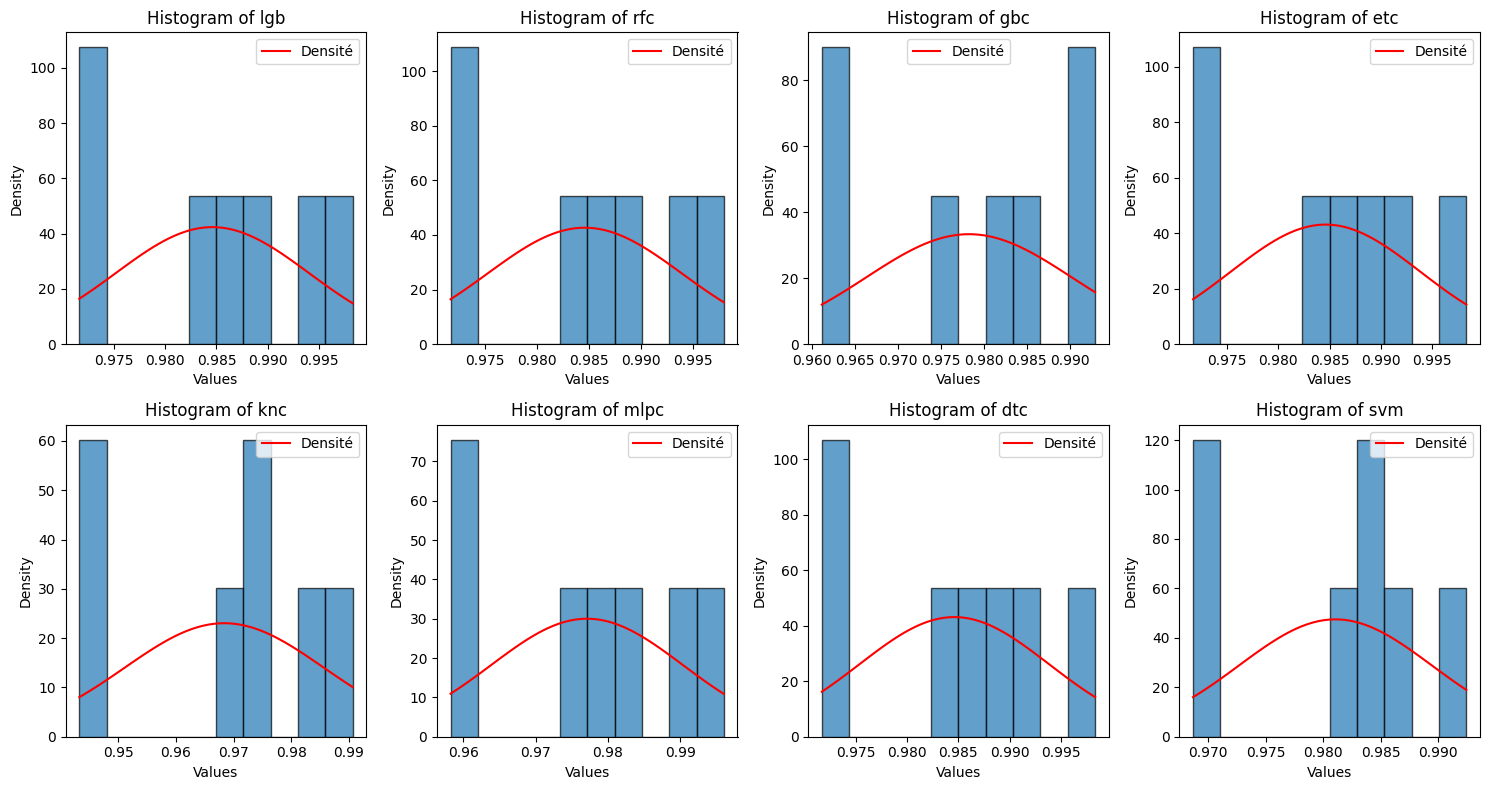

In [ ]:
from scipy.stats import norm
import math
from scipy import stats

# Supposons que df_results soit votre DataFrame

# Déterminer le nombre de lignes et de colonnes pour la grille de sous-graphiques
num_rows =2  # Ajuster le nombre de lignes désiré
num_cols = math.ceil(len(filtered_df_results_train) / num_rows)

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Itérer sur les lignes du DataFrame et les axes
for i, (index, row) in enumerate(filtered_df_results_train.iterrows()):
    # Extraire les données de la ligne
    data = row  # Adaptez si nécessaire pour sélectionner les colonnes à tracer

    # Créer l'histogramme sur le sous-graphe correspondant
    axes[i].hist(data, density=True, edgecolor='black', alpha=0.7)

    # Ajouter la courbe de densité
    x = np.linspace(data.min(), data.max(), 100)
    axes[i].plot(x, norm.pdf(x, np.mean(data), np.std(data)), color='red', label='Densité')

    # Personnaliser le sous-graphe
    axes[i].set_title(f"Histogram of {index}")
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### Test data

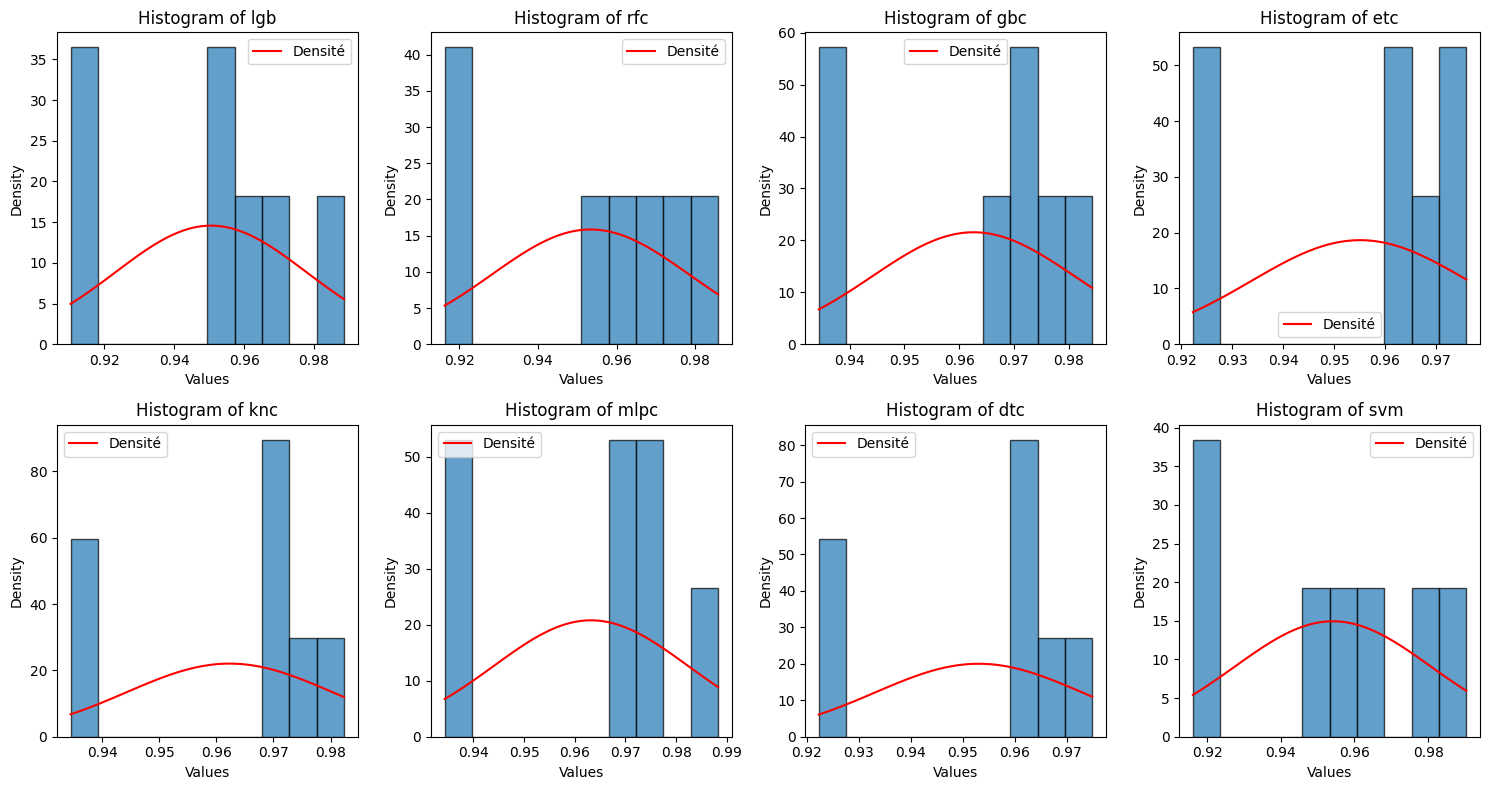

In [ ]:
# Supposons que df_results soit votre DataFrame

# Déterminer le nombre de lignes et de colonnes pour la grille de sous-graphiques
num_rows = 2  # Ajuster le nombre de lignes désiré
num_cols = math.ceil(len(filtered_df_results) / num_rows)

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Itérer sur les lignes du DataFrame et les axes
for i, (index, row) in enumerate(filtered_df_results.iterrows()):
    # Extraire les données de la ligne
    data = row  # Adaptez si nécessaire pour sélectionner les colonnes à tracer

    # Créer l'histogramme sur le sous-graphe correspondant
    axes[i].hist(data, density=True, edgecolor='black', alpha=0.7)

    # Ajouter la courbe de densité
    x = np.linspace(data.min(), data.max(), 100)
    axes[i].plot(x, norm.pdf(x, np.mean(data), np.std(data)), color='red', label='Densité')

    # Personnaliser le sous-graphe
    axes[i].set_title(f"Histogram of {index}")
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### **IV-2- Statistics Test of shapiro**

#### Train data

In [ ]:
from scipy.stats import shapiro

# Liste pour stocker les résultats
results_shapiro = []

# Boucle pour effectuer le test sur chaque ligne du DataFrame
for index, row in filtered_df_results_train.iterrows():
    # Extraire les données de la ligne
    data_var = row.dropna()  # Exclure les valeurs manquantes
    
    # Effectuer le test de Shapiro-Wilk
    stat, p = shapiro(data_var)
    
    # Calculer la variance-covariance synthétique (V)
    if len(data_var) > 1:
        covariance_matrix = np.cov(data_var, rowvar=False)
        if covariance_matrix.ndim > 1:
            variance_covariance_value = np.trace(covariance_matrix)  # Somme des variances diagonales
        else:
            variance_covariance_value = covariance_matrix  # Scalaire
    else:
        variance_covariance_value = np.var(data_var, ddof=1)  # Variance si une seule observation
    
    # Calculer la cote Z
    mean = np.mean(data_var)
    std_dev = np.std(data_var, ddof=1)
    z_score = (data_var - mean) / std_dev
    z_statistic = z_score.mean()  # Moyenne des scores Z
    
    # Ajouter les résultats à la liste
    results_shapiro.append([index, stat, variance_covariance_value, z_statistic, p])

# Créer un DataFrame à partir de la liste de résultats
df_test_shapiro = pd.DataFrame(results_shapiro, columns=['Index', 'W-statistic', 'Variance-Covariance (V)', 'Z-statistic', 'p-value'])

# Afficher le DataFrame des résultats
df_test_shapiro.to_excel('Test_de_shapiro_wilk_sur_donnee_entrainement.xlsx')
df_test_shapiro

,Index,W-statistic,Variance-Covariance (V),Z-statistic,p-value
0,lgb,0.928006,0.00010346551958348896,-4.694657e-15,0.534070
1,rfc,0.925585,0.00010205293749930482,0.000000e+00,0.514010
2,gbc,0.889698,0.00016684974198251438,6.122087e-15,0.273091
3,etc,0.922986,9.987605172286856e-05,3.203786e-15,0.492947
4,knc,0.892184,0.00035016892466198255,4.250568e-15,0.286248
5,mlpc,0.913575,0.0002062801472898196,-9.960287e-15,0.421183
6,dtc,0.922986,9.987605172286856e-05,3.203786e-15,0.492947
7,svm,0.873613,8.236696888952206e-05,-1.221245e-14,0.199575


Ces modèles ont des p-values supérieures à 0.05, indiquant que les distributions des données pourraient être normales

### Test data

In [ ]:
# Liste pour stocker les résultats
results_shapiro = []

# Boucle pour effectuer le test sur chaque ligne du DataFrame
for index, row in filtered_df_results.iterrows():
    # Extraire les données de la ligne
    data_var = row.dropna()  # Exclure les valeurs manquantes
    
    # Effectuer le test de Shapiro-Wilk
    stat, p = shapiro(data_var)
    covariance_matrix = np.cov(data_var, rowvar=False)

    # Calculer la cote Z
    mean = np.mean(data_var)
    std_dev = np.std(data_var, ddof=1)
    z_score = (data_var - mean) / std_dev
    z_statistic = z_score.mean()  # Moyenne des scores Z
    
    # Ajouter les résultats à la liste
    results_shapiro.append([index, stat,covariance_matrix, z_statistic, p])

# Créer un DataFrame à partir de la liste de résultats
df_test_shapiro = pd.DataFrame(results_shapiro, columns=['Index', 'W-statistic', 'Variance-Covariance (V)', 'Z-statistic', 'p-value'])

# Afficher le DataFrame des résultats

df_test_shapiro.to_excel('Test_de_shapiro_sur_donnee_test_.xlsx')
df_test_shapiro

,Index,W-statistic,Variance-Covariance (V),Z-statistic,p-value
0,lgb,0.875341,0.000874320597395728,1.078502e-15,0.206559
1,rfc,0.878189,0.0007396017216859513,6.026925e-16,0.218532
2,gbc,0.808344,0.000399233570989471,-1.617754e-15,0.049489
3,etc,0.791197,0.0005339897931645086,4.726378e-15,0.033484
4,knc,0.792259,0.00038197984006508733,-4.884981e-15,0.034313
5,mlpc,0.836816,0.0004300070500813059,-2.283887e-15,0.092778
6,dtc,0.784380,0.00046339777225116297,2.918301e-15,0.028602
7,svm,0.911777,0.0008319825415265001,-2.188725e-15,0.408318


Normalité: lgb, rfc, mlpc, svm


Écart significatif par rapport à la normalité : gbc, etc, knc, dtc

## **VI-3- Difference Test**

In [ ]:
differences = filtered_df_results_train - filtered_df_results
differences=differences.transpose()

#### Students and Wilxcon

In [ ]:

# DataFrame pour stocker les résultats des tests
results_dict = {'Variable':[], 'Test':[], 'Statistic':[], 'P-Value':[]}
# Effectuer le test t pour les variables normalement distribuées
for var in ['lgb','rfc','mlpc','svm']:
    stat, p_value = stats.ttest_1samp(differences[var], 0)  # Test t d'échantillon unique (moyenne différente de 0)
    results_dict['Variable'].append(var)
    results_dict['Test'].append('Student\'s t-test')
    results_dict['Statistic'].append(stat)
    results_dict['P-Value'].append(p_value)

# Effectuer le test de Wilcoxon pour les variables non normalement distribuées
for var in ['gbc','etc','knc','dtc']:
    stat, p_value = stats.wilcoxon(differences[var])  # Test de Wilcoxon pour échantillons appariés
    results_dict['Variable'].append(var)
    results_dict['Test'].append('Wilcoxon test')
    results_dict['Statistic'].append(stat)
    results_dict['P-Value'].append(p_value)

results = pd.DataFrame(results_dict)
print(results)
results.to_excel('student_wilconxon.xlsx')

  Variable              Test  Statistic   P-Value
0      lgb  Student's t-test   4.581576  0.003764
1      rfc  Student's t-test   4.776057  0.003075
2     mlpc  Student's t-test   5.091285  0.002241
3      svm  Student's t-test   3.415202  0.014227
4      gbc     Wilcoxon test   0.000000  0.015625
5      etc     Wilcoxon test   0.000000  0.015625
6      knc     Wilcoxon test   3.000000  0.078125
7      dtc     Wilcoxon test   0.000000  0.015625


 Ces résultats suggèrent que les modèles testés présentent des différences significatives par rapport à une hypothèse de moyenne nulle ou de distribution égale à zéro, sauf pour `knc` où cette différence n'est pas significative selon le test de Wilcoxon.

### Delong Test

In [ ]:
from rocauc_comparison import delong_roc_test

In [ ]:
differences.columns

Index(['lgb', 'rfc', 'gbc', 'etc', 'knc', 'mlpc', 'dtc', 'svm'], dtype='object')

In [ ]:
predictions_1=predictions[differences.columns]
predictions_train_1=predictions_train[differences.columns]

In [ ]:
print('Test de delong des autres modèles par rapport à knn')
delong_dict={'model':[],'log p value':[], 'P value':[]}
for var in predictions_train_1.columns:
    delong_dict['model'].append(var)
    p_value_log=delong_roc_test(y_test,predictions_train_1['knc'],predictions_train_1[var])
    delong_dict['log p value'].append(p_value_log)
    # Convertir la p-value logarithmique en p-value réelle
    p_value = np.exp(p_value_log)
    delong_dict['P value'].append(p_value)

df_delong=pd.DataFrame(delong_dict)
df_delong.to_excel('Test_de_delong_train.xlsx')
print(df_delong)

Test de delong des autres modèles par rapport à knn
  model                log p value                  P value
0   lgb   [[-0.10296435554127437]]   [[0.9021591298822833]]
1   rfc   [[-0.10296435554127437]]   [[0.9021591298822833]]
2   gbc     [[-1.087731126265778]]  [[0.33698019251879124]]
3   etc    [[-0.1631741479160433]]   [[0.8494432467618783]]
4   knc  [[5.551115123125783e-17]]                  [[1.0]]
5  mlpc    [[-0.8061718318594508]]   [[0.4465643215314825]]
6   dtc    [[-0.1631741479160433]]   [[0.8494432467618783]]
7   svm   [[-0.33721614582593645]]   [[0.7137545481622345]]


In [ ]:
print('Test de delong sur données test des autres modèles par rapport à knn')
delong_dict={'model':[],'log p value':[], 'P value':[]}
for var in predictions_1.columns:
    delong_dict['model'].append(var)
    p_value_log=delong_roc_test(y_test,predictions_1['knc'],predictions_1[var])
    p_value = np.exp(p_value_log)
    delong_dict['log p value'].append(p_value_log)
    delong_dict['P value'].append(p_value)

df_delong=pd.DataFrame(delong_dict)
df_delong.to_excel('Test_de_delong_train.xlsx')
print(df_delong)

Test de delong sur données test des autres modèles par rapport à knn
  model                log p value                  P value
0   lgb    [[-0.9832519513595788]]   [[0.3740925877564624]]
1   rfc    [[-0.7861939101491677]]     [[0.45557546079651]]
2   gbc   [[-0.06232710576043299]]   [[0.9395754959620835]]
3   etc    [[-0.5416699732877086]]   [[0.5817758904942266]]
4   knc  [[5.551115123125783e-17]]                  [[1.0]]
5  mlpc    [[-0.0623271057604331]]   [[0.9395754959620833]]
6   dtc    [[-0.5416699732877086]]   [[0.5817758904942266]]
7   svm     [[-0.744508000916617]]  [[0.47496792624758527]]


# **OPTIMISATION**

In [ ]:

knn = models['knc']

# Créer un dictionnaire avec les paramètres à tester
param_grid = {'n_neighbors': np.arange(1,11),
            'metric': ['euclidean', 'manhattan', 'minkowski']}

from sklearn.metrics import make_scorer

scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'AUC': make_scorer(roc_auc_score, needs_proba=True),  # Pour AUC, il faut activer `needs_proba=True`
    'Recall': make_scorer(recall_score),
    'Precision': make_scorer(precision_score),
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'MCC': make_scorer(matthews_corrcoef)
}

best_params = {}
best_scores = {}

for metric_name, scorer in scorers.items():
    print(f"Optimisation pour {metric_name}")
    
    # Créer le GridSearchCV pour chaque métrique
    grid = GridSearchCV(knn, param_grid, cv=11, scoring=scorer, refit='Racall')
    grid.fit(X_train, y_train)
    
    # Enregistrer les meilleurs paramètres et le meilleur score
    best_params[metric_name] = grid.best_params_
    best_scores[metric_name] = grid.best_score_
    
    print(f"Meilleurs paramètres pour {metric_name}: {grid.best_params_}")
    print(f"Meilleur score pour {metric_name}: {grid.best_score_}\n")

# Afficher les résultats globaux
print("Meilleurs paramètres pour chaque métrique:")
print(best_params)
print("\nMeilleurs scores pour chaque métrique:")
print(best_scores)


Optimisation pour Accuracy


/home/noatech/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Meilleurs paramètres pour Accuracy: {'metric': 'manhattan', 'n_neighbors': 4}
Meilleur score pour Accuracy: 0.970961038961039

Optimisation pour AUC
Meilleurs paramètres pour AUC: {'metric': 'manhattan', 'n_neighbors': 10}
Meilleur score pour AUC: 0.9864211256851475

Optimisation pour Recall
Meilleurs paramètres pour Recall: {'metric': 'manhattan', 'n_neighbors': 7}
Meilleur score pour Recall: 0.9848830773488308

Optimisation pour Precision
Meilleurs paramètres pour Precision: {'metric': 'manhattan', 'n_neighbors': 2}
Meilleur score pour Precision: 0.973136511759282

Optimisation pour F1
Meilleurs paramètres pour F1: {'metric': 'manhattan', 'n_neighbors': 4}
Meilleur score pour F1: 0.9750579129359237

Optimisation pour Kappa
Meilleurs paramètres pour Kappa: {'metric': 'manhattan', 'n_neighbors': 4}
Meilleur score pour Kappa: 0.9403059898079988

Optimisation pour MCC
Meilleurs paramètres pour MCC: {'metric': 'manhattan', 'n_neighbors': 4}
Meilleur score pour MCC: 0.9407671068206295

Mei

L'optimisation du modèle KNN a révélé des performances exceptionnelles avec des scores élevés sur toutes les métriques évaluées. La distance de Manhattan a été identifiée comme la meilleure métrique pour toutes les évaluations, tandis que le nombre optimal de voisins varie selon la métrique spécifique. L'accuracy maximale obtenue est de 0.971, tandis que l'AUC atteint 0.986, indiquant une excellente capacité de discrimination du modèle. Les scores de rappel (0.985) et de précision (0.973) ainsi que les mesures F1, Kappa et MCC, qui se situent autour de 0.94-0.98, montrent que le modèle est bien équilibré, offrant un compromis solide entre sensibilité et spécificité. Ces résultats suggèrent que le modèle KNN est bien adapté au jeu de données et performant dans divers aspects de l'évaluation.

Pour spécifier le modèle final, nous pouvons choisir les hyperparamètres basés sur les performances globales ou les priorités spécifiques de notre problème. Les résultats montrent que les paramètres **`n_neighbors` : 4** et **`metric` : 'manhattan'** offrent des scores élevés pour plusieurs métriques importantes telles que l'Accuracy, le F1-score, le Kappa et le MCC, ce qui en fait un bon choix pour un modèle équilibré et polyvalent. S'il y avait une priorité particulière, comme maximiser l'AUC, nous pourrions choisir **`n_neighbors` : 10** et **`metric` : 'manhattan'**, ou pour un meilleur Recall, **`n_neighbors` : 7** avec le même metric. En résumé, pour une performance globale équilibrée, les paramètres **`n_neighbors` : 4** et **`metric` : 'manhattan'** sont utlisés.

In [ ]:
# Initialiser le modèle avec les meilleurs paramètres
model = KNeighborsClassifier(n_neighbors= 4, metric='manhattan')
results = {
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],
}
model=model.fit(X_train,y_train)
y_pred0= model.predict(X_train)
y_prob0 = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
fpr, tpr, _ = roc_curve(y_train, y_prob0)
roc_auc = auc(fpr, tpr)
results['Accuracy'].append(accuracy_score(y_train, y_pred0))
results['AUC'].append(roc_auc_score(y_train, y_prob0) if y_prob0 is not None else np.nan)
results['Recall'].append(recall_score(y_train, y_pred0))
results['Precision'].append(precision_score(y_train, y_pred0))
results['F1'].append(f1_score(y_train, y_pred0))
results['Kappa'].append(cohen_kappa_score(y_train, y_pred0))
results['MCC'].append(matthews_corrcoef(y_train, y_pred0))

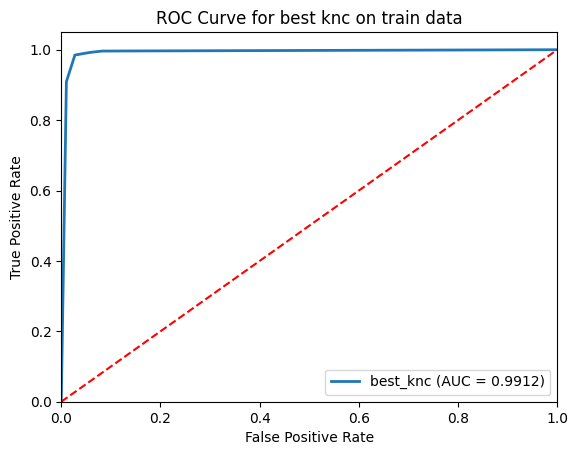

In [ ]:
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'best_knc (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for best knc on train data')
plt.legend(loc="lower right")
plt.show()

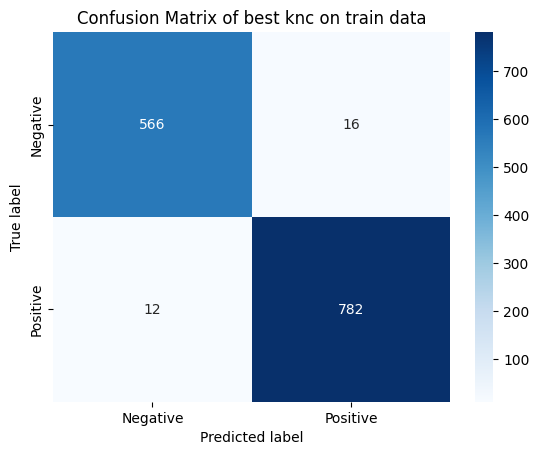

In [ ]:
conf_matrix =confusion_matrix(y_train,y_pred0)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of best knc on train data')
plt.show()

In [ ]:
pd.DataFrame(results)

,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
0,0.979651,0.991249,0.984887,0.97995,0.982412,0.958274,0.958292


<Axes: title={'center': 'metrics of knc on train data'}>

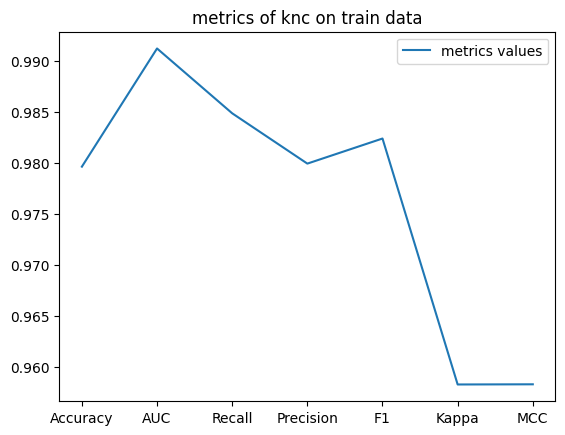

In [ ]:
pd.DataFrame(results,index=['metrics values']).transpose().plot(legend=True,title='metrics of knc on train data')

In [ ]:
results1 = {
    'Accuracy': [],
    'AUC': [],
    'Recall': [],
    'Precision': [],
    'F1': [],
    'Kappa': [],
    'MCC': [],}

y_pred01= model.predict(X_test)
y_prob0 = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
fpr, tpr, _ = roc_curve(y_test, y_prob0)
roc_auc = auc(fpr, tpr)
results1['Accuracy'].append(accuracy_score(y_test, y_pred01))
results1['AUC'].append(roc_auc_score(y_test, y_prob0) if y_prob0 is not None else np.nan)
results1['Recall'].append(recall_score(y_test, y_pred01))
results1['Precision'].append(precision_score(y_test, y_pred01))
results1['F1'].append(f1_score(y_test, y_pred01))
results1['Kappa'].append(cohen_kappa_score(y_test, y_pred01))
results1['MCC'].append(matthews_corrcoef(y_test, y_pred01))

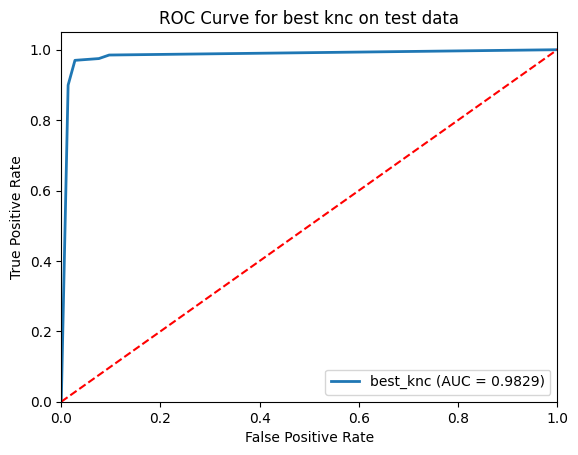

In [ ]:
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'best_knc (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for best knc on test data')
plt.legend(loc="lower right")
plt.show()

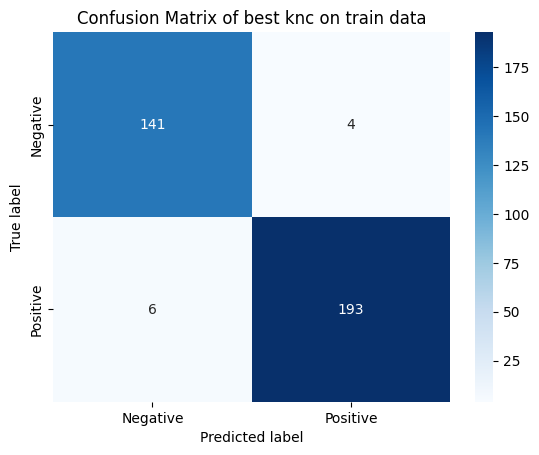

In [ ]:
conf_matrix =confusion_matrix(y_test,y_pred01)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of best knc on train data')
plt.show()

In [ ]:
pd.DataFrame(results1)

,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
0,0.97093,0.982949,0.969849,0.979695,0.974747,0.940503,0.94057


<Axes: title={'center': 'metrics of knc on train data'}>

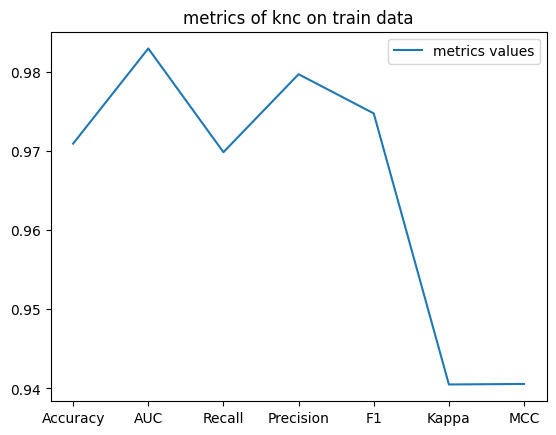

In [ ]:
pd.DataFrame(results1,index=['metrics values']).transpose().plot(legend=True,title='metrics of knc on train data')

#### Comparison

In [ ]:
# Concaténer les deux DataFrames
bestdf=pd.DataFrame({'test':pd.DataFrame(results1).iloc[0,].to_list(),\
    'train':pd.DataFrame(results).iloc[0,].to_list()},index=results.keys())

bestdf

,test,train
Accuracy,0.970930,0.979651
AUC,0.982949,0.991249
Recall,0.969849,0.984887
Precision,0.979695,0.979950
F1,0.974747,0.982412
Kappa,0.940503,0.958274
MCC,0.940570,0.958292


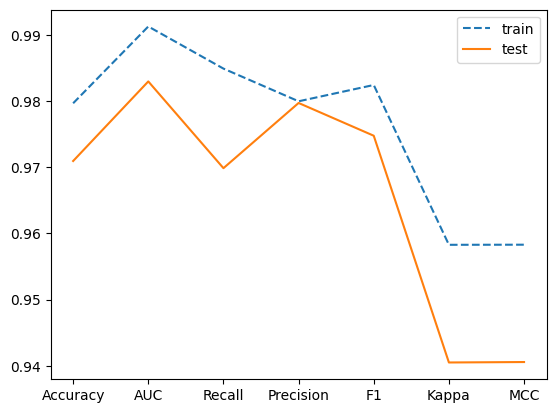

In [ ]:
plt.figure()
plt.plot(bestdf['train'],linestyle='--',label='train')
plt.plot(bestdf['test'],label='test')
plt.legend()

/tmp/ipykernel_25130/3320743303.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2,color='red')
/tmp/ipykernel_25130/3320743303.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2,color='red')


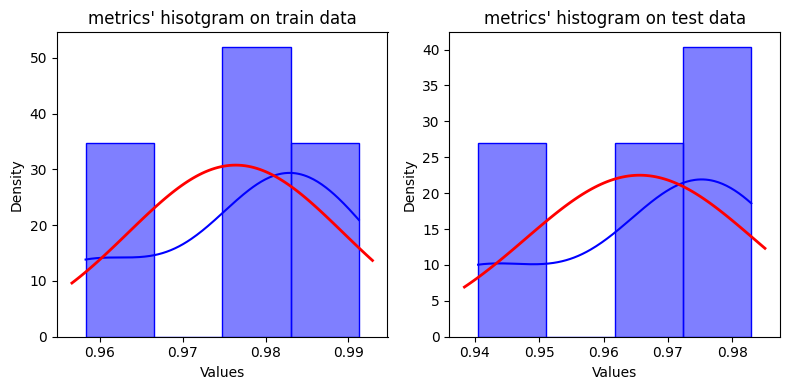

In [ ]:
# Configuration de la figure pour afficher l'histogramme et la courbe de normalité
plt.figure(figsize=(8,4))

# Histogramme pour la colonne 'test'
plt.subplot(1, 2, 1)
sns.histplot(bestdf['train'], kde=True, color='blue', stat='density',edgecolor='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, bestdf['train'].mean(), bestdf['train'].std())
plt.plot(x, p, 'k', linewidth=2,color='red')
plt.title("metrics' hisotgram on train data")
plt.xlabel('Values')
plt.ylabel('Density')
# Courbe de normalité pour la colonne 'test'
plt.subplot(1, 2, 2)
sns.histplot(bestdf['test'], kde=True, color='blue', stat='density',edgecolor='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, bestdf['test'].mean(), bestdf['test'].std())
plt.plot(x, p, 'k', linewidth=2,color='red')
plt.title("metrics' histogram on test data")
plt.xlabel('Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
# Liste pour stocker les résultats
results_shapiro = []

for var in bestdf:
    stat, p = shapiro(bestdf[var])
    #Calculer la variance-covariance synthétique (V)
    covariance_matrix = np.cov(bestdf[var], rowvar=False)
    
    # Calculer la cote Z
    mean = np.mean(bestdf[var])
    std_dev = np.std(bestdf[var], ddof=1)
    z_score = (bestdf[var] - mean) / std_dev
    z_statistic = z_score.mean() # Moyenne des scores Z
    # Ajouter les résultats à la liste
    results_shapiro.append([var, stat,covariance_matrix, z_statistic, p])

# Créer un DataFrame à partir de la liste de résultats
df_test_shapiro = pd.DataFrame(results_shapiro, columns=['data', 'W-statistic', 'Variance-Covariance (V)', 'Z-statistic', 'p-value'])
# Afficher le DataFrame des résultats
df_test_shapiro

,data,W-statistic,Variance-Covariance (V),Z-statistic,p-value
0,test,0.806207,0.0003143675618835478,1.744636e-15,0.047159
1,train,0.833811,0.00016804614174633872,-2.474211e-15,0.086937


In [ ]:
rstat, p_value = stats.wilcoxon(bestdf['train']-bestdf['test'])  # Test de Wilcoxon pour échantillons appariés
print("Wilcoxon's test \n",'Statique du test:',stat, 'P value :',p_value)

Wilcoxon's test 
 Statique du test: 0.8338106073045386 P value : 0.015625
